<a href="https://colab.research.google.com/github/komorimasashi/Hokudai2023Resources/blob/main/SensoryConsonance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#音の協和と不協和を体験するプログラム

In [1]:
#ライブラリを準備する
import numpy as np  #数値計算ライブラリ
import matplotlib.pyplot as plt  #描画ライブラリ
import IPython.display  #オーディオ再生ライブラリ
from scipy import signal  #信号処理ライブラリ

In [2]:
#変数設定
sampling_rate = 44100  #サンプリング周波数を設定
t = np.arange(0, 2, 1 / sampling_rate)  #時間軸を作成（0から2までの２秒分の標本点の時点のリストを作成）

# 波形を２つ作ってみる
A0 = 1  #波形の振幅を設定（0〜１の値）
f0 = 261.6  #周波数の設定
y0 =[0]  #波形の数値を格納する変数を用意
y0 = A0* np.sin(2*np.pi*f0*t)  #波形を作る

A1 = 1  #波形の振幅を設定（0〜１の値）
f1 = 261.6*(2/3)  #周波数の設定
y1 =[0]  #波形の数値を格納する変数を用意
y1 = A1* np.sin(2*np.pi*f1*t)  #波形を作る

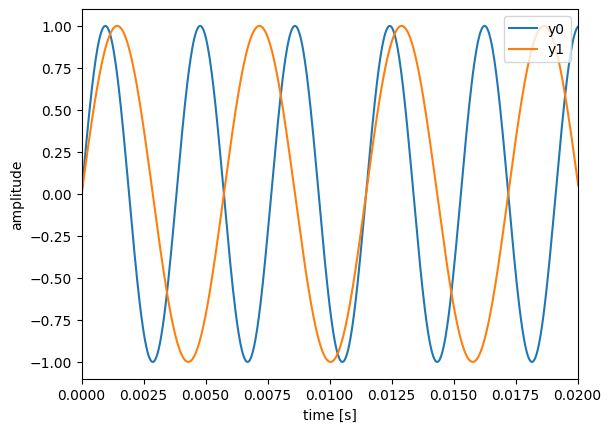

In [11]:
#描画
plt.plot(t, y0, label="y0")  #横軸t,縦軸y
plt.plot(t, y1, label="y1")  #横軸t,縦軸y
plt.xlabel("time [s]")  #x軸のラベル設定
plt.ylabel("amplitude")  #y軸のラベル設定
plt.legend(loc='upper right')  #凡例を右上(upper right）に表示
plt.xlim([0,0.02])  #0から0.02だけの範囲を表示するように設定
plt.show()  #プロット


In [12]:
#音（y0）の出力
IPython.display.Audio(y0, rate = sampling_rate)


In [13]:
#音（y1）の出力
IPython.display.Audio(y1, rate = sampling_rate)


In [14]:
#音（y0とy1を同時に鳴らす）の出力
IPython.display.Audio(y0+y1, rate = sampling_rate)

##実効値を求めよう

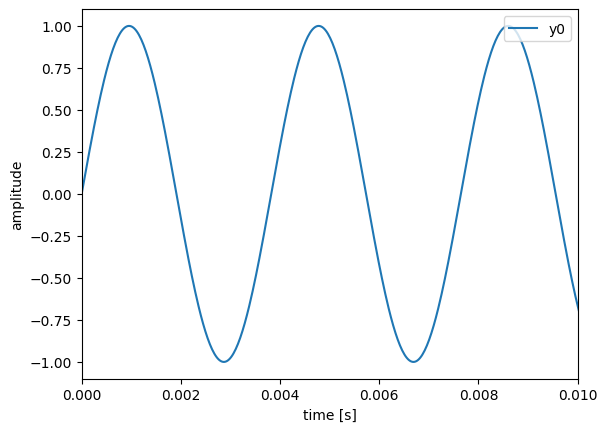

0.7070715612542356


In [15]:
#描画
plt.plot(t, y0, label="y0")  #横軸t,縦軸y
plt.xlabel("time [s]")  #x軸のラベル設定
plt.ylabel("amplitude")  #y軸のラベル設定
plt.legend(loc='upper right')  #凡例を右上(upper right）に表示
plt.xlim([0,0.01])  #0から0.01だけの範囲を表示するように設定
plt.show()  #プロット

# 実効値の計算
rms = np.sqrt(np.square(y0).mean())
print(rms)

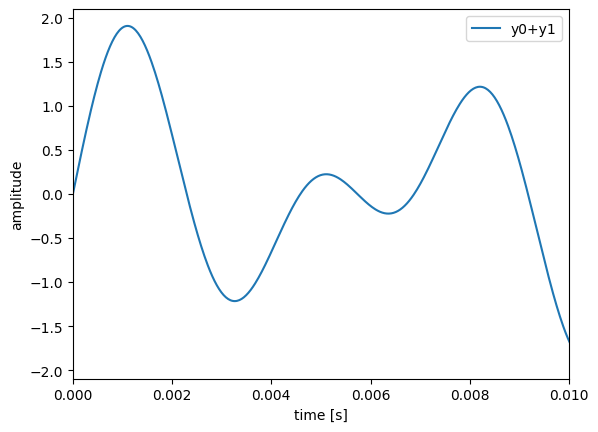

1.0002793382804376

In [16]:
#描画
plt.plot(t, y0+y1, label="y0+y1")  #横軸t,縦軸y
plt.xlabel("time [s]")  #x軸のラベル設定
plt.ylabel("amplitude")  #y軸のラベル設定
plt.legend(loc='upper right')  #凡例を右上(upper right）に表示
plt.xlim([0,0.01])  #0から0.01だけの範囲を表示するように設定
plt.show()  #プロット

np.sqrt(np.square(y0+y1).mean())

## スペクトログラムを求める


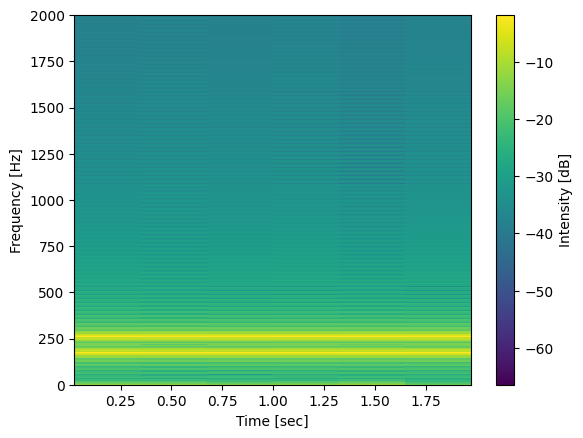

In [17]:
#スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(y0+y1, sampling_rate, nperseg=16384)

# 描画
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
cbar = plt.colorbar() #カラーバー表示
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示
plt.ylim([0,2000])
plt.show()